<a href="https://colab.research.google.com/github/shainaboover/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/SHAINA_BOOVER_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import math

In [0]:
# create list 
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [4]:
# find mean 
mean = sum(sales) / len(sales)
mean

3052.714285714286

In [0]:
# find variance
# start with function
def sub_mean(x):
  return x-mean

In [6]:
# apply function to list
dist = list(map(sub_mean, sales))
dist

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [7]:
# square them
dist_sq = list(map(lambda x: x**2, dist))
dist_sq

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [8]:
# find variance
vari = sum(dist_sq) / len(sales)
vari

183761.06122448976

In [9]:
# find std dev of sales
std_sales = np.sqrt(vari)
std_sales

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# create list
traffic = [127, 80, 105, 92, 120, 115, 93]

In [11]:
# find covariance
np.cov(sales, traffic)[0][1]

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [12]:
# find mean 
mean_t = sum(traffic) / len(traffic)
mean_t

104.57142857142857

In [0]:
# write a function
def sub_mean_t(x):
  return x-mean_t

In [14]:
# distance
dist_t = list(map(sub_mean_t, traffic))
dist_t

[22.42857142857143,
 -24.57142857142857,
 0.4285714285714306,
 -12.57142857142857,
 15.42857142857143,
 10.42857142857143,
 -11.57142857142857]

In [15]:
# squared
dist_t_sq = list(map(lambda x: x**2, dist_t))
dist_t_sq

[503.0408163265307,
 603.7551020408163,
 0.18367346938775683,
 158.04081632653057,
 238.0408163265307,
 108.75510204081637,
 133.89795918367344]

In [16]:
# variance
vari_t = sum(dist_t_sq) / len(traffic)
vari_t

249.3877551020408

In [17]:
# std dev of customers who entered the store
std_traffic = np.sqrt(vari_t)
std_traffic

15.792015549069118

In [18]:
# look at std deviation of both sales and clients who entered store
print(std_traffic)
print(std_sales)

15.792015549069118
428.67360686714756


In [19]:
# turn into dataframe
df = pd.DataFrame({'sales': sales})
df['traffic'] = pd.Series(traffic)
# find cov using pandas
cov_st = df['sales'].cov(df['traffic'])
cov_st

7604.357142857142

In [20]:
# calculate denominator
denom = std_sales * std_traffic
denom

6769.620265121536

In [21]:
# calculate correlation
cor_st = cov_st/denom
print(cor_st)

1.123306307450706


In [22]:
# check work
df.corr()

,sales,traffic
sales,1.000000,0.962834
traffic,0.962834,1.000000


In [23]:
df['sales'].corr(df['traffic'])

0.9628339778148909

In [0]:
# ??? 

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [25]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [26]:
# covariance
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [27]:
# correlation
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# orthongal is perpendicular but in higher dimensions
# create vectors
a = [1, 2]
b = [2, -1]

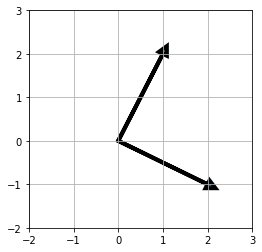

In [29]:
# plot them
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2, 3)
plt.ylim(-2, 3);

for vect in [a, b]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=.2, linewidth=4)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [30]:
# create vectors 
# check for orthogonality
# not orthongonal b/c dot product is not equal to 0
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# create vector
c = np.array([2, -15, 6, 20])

In [32]:
# find norm
norm_c = np.linalg.norm(c)
norm_c

25.787593916455254

In [33]:
# multiply them
cc = c * c
cc

array([  4, 225,  36, 400])

In [34]:
# multiply by transpose of itself
# its the same as multiplying by itself
# is this b/c there is only 1 row ?
c.T * c

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
a\begin{bmatrix} 7 & 12 \end{bmatrix} +
b\begin{bmatrix} 2 & 11 & -8 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [35]:
f = np.array([4, 12, 11, 9, 2])
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [36]:
# linearly dependent
r = [.4, -1]
t = np.multiply(r, 2)
print(r, '\n', t)

[0.4, -1] 
 [ 0.8 -2. ]


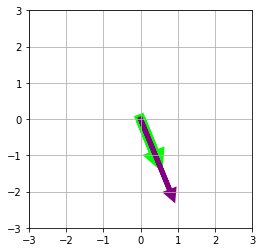

In [37]:
# plot them
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)

for myvect, mycolor, width in [(r, 'lime', 10), (t, 'purple', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=width,
            color=mycolor)

In [38]:
# linearly independent
u = np.random.randint(low=-3, high=3, size=2)
v = np.random.randint(low=-3, high=3, size=2)
print(u, '\n', v)

[-1  2] 
 [ 0 -2]


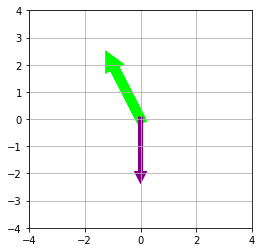

In [39]:
# plot them
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 4)

for myvect, mycolor, width in [(u, 'lime', 10), (v, 'purple', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=width,
            color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# create the vectors
g = np.array([1, 2])
h = np.array([4, 8])

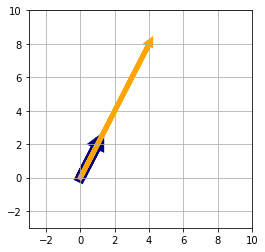

In [41]:
# plot them
# span is all vectors where tip is falls on this line
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,10)
plt.ylim(-3,10)

for myvect, mycolor, width in [(g, 'navy', 10), (h, 'orange', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=width,
            color=mycolor)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# create vectors
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

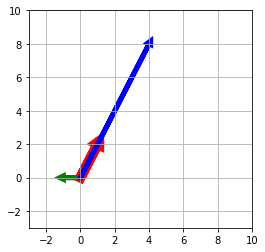

In [43]:
# plot
# span is all 2d vectors ? numpy .linalg.matrix_rank
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,10)
plt.ylim(-3,10)

for myvect, mycolor, width in [(l, 'red', 10), (m, 'green', 5), (n, 'blue', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=width,
            color=mycolor)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# create vectors

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [45]:
# find rank
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank tells us how many dimensions are in the output of a transformation

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# create vectors
v = np.array([1, 3])
w = np.array([-1, 2])

In [51]:
# find dot product
wdotv = np.dot(v, w)
vdotv = np.dot(v, v)
wdotv, vdotv

(5, 10)

In [52]:
# linear projection
frac = wdotv/vdotv
project = np.multiply(frac,v)
print(project)

[0.5 1.5]


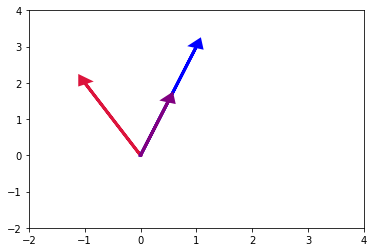

In [62]:
plt.xlim(-2,4)
plt.ylim(-2,4)

plt.arrow(0,0,
            w[0],
            w[1],
            head_width=.2,
            head_length=.2,
            linewidth=3,
            color='crimson')
plt.arrow(0,0,
            v[0],
            v[1],
            head_width=.2,
            head_length=.2,
            linewidth=3,
            color='blue')
plt.arrow(0,0,
            project[0],
            project[1],
            head_width=.2,
            head_length=.2,
            linewidth=3,
            color='purple');

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

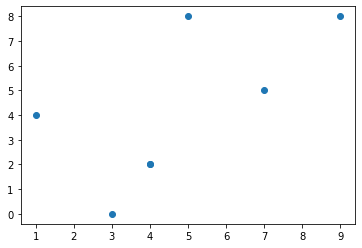

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()